In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from scipy.ndimage.filters import convolve
from scipy.stats import linregress

In [1]:
im = Image.open('silver/small.jpg')

NameError: name 'Image' is not defined

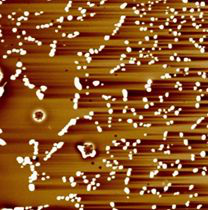

In [87]:
im

In [88]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [1/3, 1/3, 1/3])

In [89]:
def reni_entropy(p, q):
    return (1 / (1 - q) * np.log(np.sum(np.power(p, q)))) if q != 1 else (-np.sum(p * np.log(p)))

In [90]:
immat = rgb2gray(np.array(im))

In [91]:
q = np.array(range(-10, 10))
# q = q[q != 1]
ws = range(1, 20)

In [92]:
ns =[]

In [93]:
for w in ws:
    ns.append(reni_entropy(convolve(immat, np.ones((w, w)), mode='constant')[::w, ::w] / np.mean(immat), 10))

In [94]:
x = -np.log(ws)
y = ns

<AxesSubplot:xlabel='log of window size (log(ϵ))', ylabel='N(q, ϵ)'>

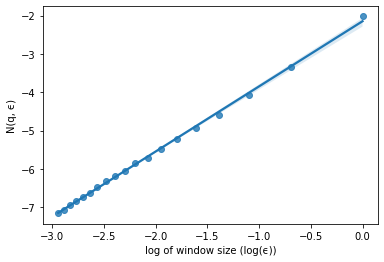

In [95]:
sns.regplot(x=pd.Series(x, name='log of window size (log(ϵ))'), 
            y=pd.Series(y, name='N(q, ϵ)'))

In [96]:
linregress(x, y).slope

1.6987427833007458

In [97]:
def get_reni_dim(immat, q):
    ws = range(1, 20)
    ns =[]
    
    for w in ws:
        conv = convolve(immat, np.ones((w, w)), mode='constant')[::w, ::w]
        ns.append(reni_entropy(conv / np.sum(conv), q))
    
    x = -np.log(ws)
    y = ns
    
    return linregress(x, y).slope

In [98]:
def get_reni_spectre(immat, qs):
    return list(map(lambda x: get_reni_dim(immat, x), qs))

In [99]:
spec = get_reni_spectre(immat, q)

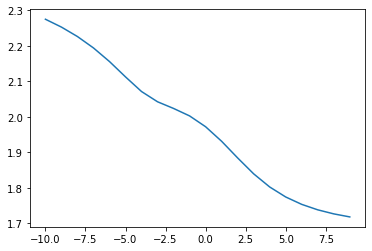

In [100]:
plt.plot(q, spec)

In [83]:
ws = range(1, 20)
ns =[]

for w in ws:
    ns.append(reni_entropy(convolve(immat, np.ones((w, w)), mode='constant')[::w, ::w] / np.mean(immat), 1))

x = -np.log(ws)
y = ns

linregress(x, y).slope

78110.33599617386

In [84]:
reni_entropy(convolve(immat, np.ones((w, w)), mode='constant')[::w, ::w] / np.mean(immat), 1)

-244367.81926542294